In [1]:
import glob
import os
import pandas as pd, datetime
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [35]:
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
Exchange_rate = pd.read_csv(r'D:\data\sale in csv\Exchange_rate.csv')
Kolkata_temp = pd.read_csv(r'D:\Users\House of Musa\kol_temp.csv')

In [3]:
Exchange_rate.head()

,Date,Price
0,2018-01-01,63.680
1,2018-01-02,63.460
2,2018-01-03,63.505
3,2018-01-04,63.400
4,2018-01-05,63.340


In [4]:
Kolkata_temp.head()

,time,tavg
0,2018-01-01,19.9
1,2018-01-02,19.3
2,2018-01-03,18.3
3,2018-01-04,16.7
4,2018-01-05,15.6


In [12]:
Kolkata_temp.rename(columns={'time': 'Date'}, inplace=True)

In [13]:
Kolkata_temp.head()

,Date,tavg
0,2018-01-01,19.9
1,2018-01-02,19.3
2,2018-01-03,18.3
3,2018-01-04,16.7
4,2018-01-05,15.6


In [14]:
merged_set = Kolkata_temp.merge(Exchange_rate, on = 'Date')

In [15]:
merged_set.head()

,Date,tavg,Price
0,2018-01-01,19.9,63.680
1,2018-01-02,19.3,63.460
2,2018-01-03,18.3,63.505
3,2018-01-04,16.7,63.400
4,2018-01-05,15.6,63.340


In [5]:
#merged = Exchange_rate.merge(Kolkata_temp, left_on = 'Date', right_on = 'time')
#merged = merged.drop('time', axis = 1)
#to drop more than one columns
# Drop columns multiple column 
#df = df.drop(['B', 'C'], axis=1)

In [17]:
path = r'D:\data\full sale data in csv' # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

C:\Users\House of Musa\AppData\Local\Temp\ipykernel_26992\3472512172.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
C:\Users\House of Musa\AppData\Local\Temp\ipykernel_26992\3472512172.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
C:\Users\House of Musa\AppData\Local\Temp\ipykernel_26992\3472512172.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
C:\Users\House of Musa\AppData\Local\Temp\ipykernel_26992\3472512172.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
C:\U

In [18]:
# splitting dataframe by Store location
# grouping by particular dataframe column
grouped = df.groupby(df.Store)
df1_CHOWRINGHEE = grouped.get_group("CITIMART - CHOWRINGHEE")
df1_NEWMARKET = grouped.get_group("CITIMART - NEW MARKET")
df1_HATIBAGAN = grouped.get_group("CITIMART - HATIBAGAN")
df1_GARIAHAT = grouped.get_group("CITIMART - GARIAHAT")

df_CHOWRINGHEE = df1_CHOWRINGHEE.loc[:, ['Bill_Date','SECTION','DIVISION' , 'RSP', 'Bill_Qty', 'Discount_Amt', 'Net_Amt']]
df_NEWMARKET = df1_NEWMARKET.loc[:, ['Bill_Date','SECTION', 'DIVISION' ,  'RSP', 'Bill_Qty', 'Discount_Amt', 'Net_Amt']]
df_HATIBAGAN = df1_HATIBAGAN.loc[:, ['Bill_Date','SECTION', 'DIVISION',  'RSP', 'Bill_Qty', 'Discount_Amt', 'Net_Amt']]
df_GARIAHAT = df1_GARIAHAT.loc[:, ['Bill_Date','SECTION', 'DIVISION',  'RSP', 'Bill_Qty', 'Discount_Amt', 'Net_Amt']]


In [19]:
df1 = df1_CHOWRINGHEE.loc[:, ['Bill_Date', 'RSP', 'Bill_Qty', 'Net_Amt']]

In [20]:
df1['Bill_Date'] = pd.to_datetime(df1['Bill_Date'], format='%Y-%m-%d')

In [21]:
df1_sort = df1.sort_values('Bill_Date', ascending=True)
df1_sort.tail()

,Bill_Date,RSP,Bill_Qty,Net_Amt
1907854,2024-04-30,599.0,1.0,599.0
1907855,2024-04-30,199.0,1.0,199.0
1907856,2024-04-30,199.0,2.0,398.0
1907858,2024-04-30,199.0,2.0,398.0
1908010,2024-04-30,51.0,1.0,45.9


In [22]:
df_a = df1_sort.groupby('Bill_Date').agg(Total_Qty=('Bill_Qty', 'sum'),
                            RSP_AVG=('RSP', 'mean'),
                            Net_Amt=('Net_Amt', 'sum')).reset_index().rename(columns={'Bill_Date': 'Bill_Date'})
df_a

,Bill_Date,Total_Qty,RSP_AVG,Net_Amt
0,2020-01-01,717.0,508.746318,286810.24
1,2020-01-02,542.0,505.220374,219617.99
2,2020-01-03,318.0,490.132841,134004.28
3,2020-01-04,558.0,490.962422,216566.59
4,2020-01-05,754.0,481.954819,287944.09
...,...,...,...,...
1484,2024-04-26,770.0,329.820442,236707.80
1485,2024-04-27,912.0,331.444444,265928.70
1486,2024-04-28,1156.0,359.304432,370048.70
1487,2024-04-29,404.0,330.712251,117375.55


In [23]:
df_f = df_a.loc[:, [ 'Bill_Date', 'Net_Amt', 'Total_Qty', 'RSP_AVG']]

In [24]:
df_f.index = pd.to_datetime(df_f.Bill_Date)


In [25]:
df_daily = df_f.resample('D').agg({"Net_Amt":'sum',"Total_Qty":'sum',"RSP_AVG":'mean'})

In [26]:
df_monthly = df_daily.resample('M').agg({"Net_Amt":'sum',"Total_Qty":'sum',"RSP_AVG":'mean'})

In [27]:
# Creating a train dataset
ddf = df_daily.copy()
ddf.reset_index(level=0, inplace=True)

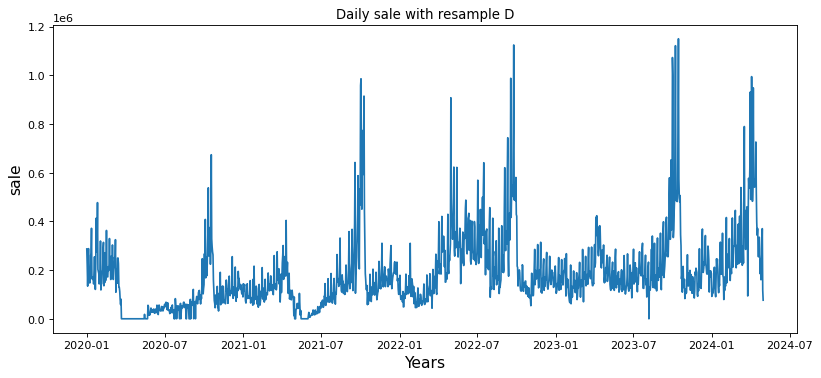

In [28]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
figure(figsize=(12, 5), dpi=80, linewidth=10)
plt.plot(ddf['Bill_Date'], ddf['Net_Amt'])
plt.title('Daily sale with resample D')
plt.xlabel('Years', fontsize=14)
plt.ylabel('sale', fontsize=14)
plt.show()

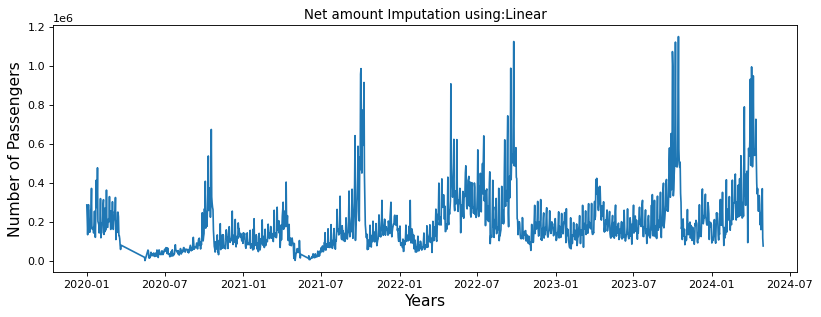

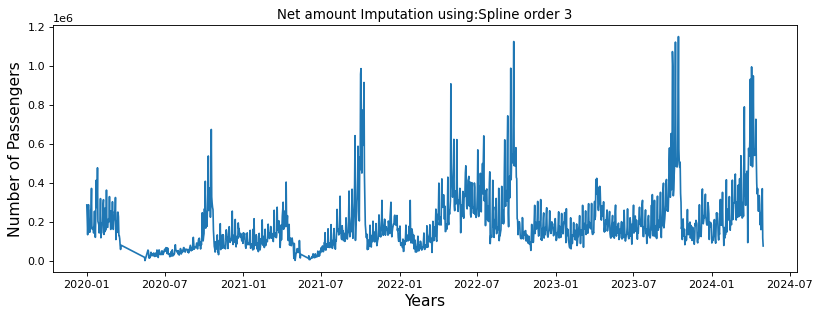

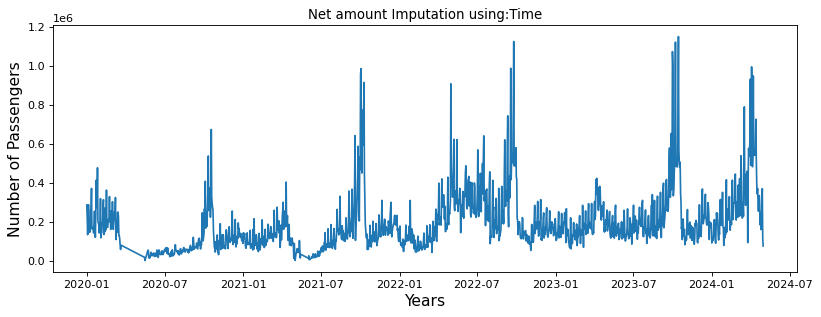

In [29]:
#Missing Value Imputation in Time Series(on indexed dataset)
#Time-Based Interpolation
#Spline Interpolation
#Linear Interpolation

df_f['Linear'] = df_f['Net_Amt'].interpolate(method='linear')
df_f['Spline order 3'] = df_f['Net_Amt'].interpolate(method='spline', order=3)
df_f['Time'] = df_f['Net_Amt'].interpolate(method='time')
methods = ['Linear', 'Spline order 3', 'Time']
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
for method in methods:
    figure(figsize=(12, 4), dpi=80, linewidth=10)
    plt.plot(df_f["Bill_Date"], df_f[method])
    plt.title("Net amount Imputation using:" + method)
    plt.xlabel("Years", fontsize=14)
    plt.ylabel("Number of Passengers", fontsize=14)
    plt.show()

In [33]:
df_f = df_f.rename(columns = {'Bill_Date': 'ds', 'Linear': 'y'})
df_f.head()   

,ds,Net_Amt,Total_Qty,RSP_AVG,y,Spline order 3,Time
Bill_Date,,,,,,,
2020-01-01,2020-01-01,286810.24,717.0,508.746318,286810.24,286810.24,286810.24
2020-01-02,2020-01-02,219617.99,542.0,505.220374,219617.99,219617.99,219617.99
2020-01-03,2020-01-03,134004.28,318.0,490.132841,134004.28,134004.28,134004.28
2020-01-04,2020-01-04,216566.59,558.0,490.962422,216566.59,216566.59,216566.59
2020-01-05,2020-01-05,287944.09,754.0,481.954819,287944.09,287944.09,287944.09


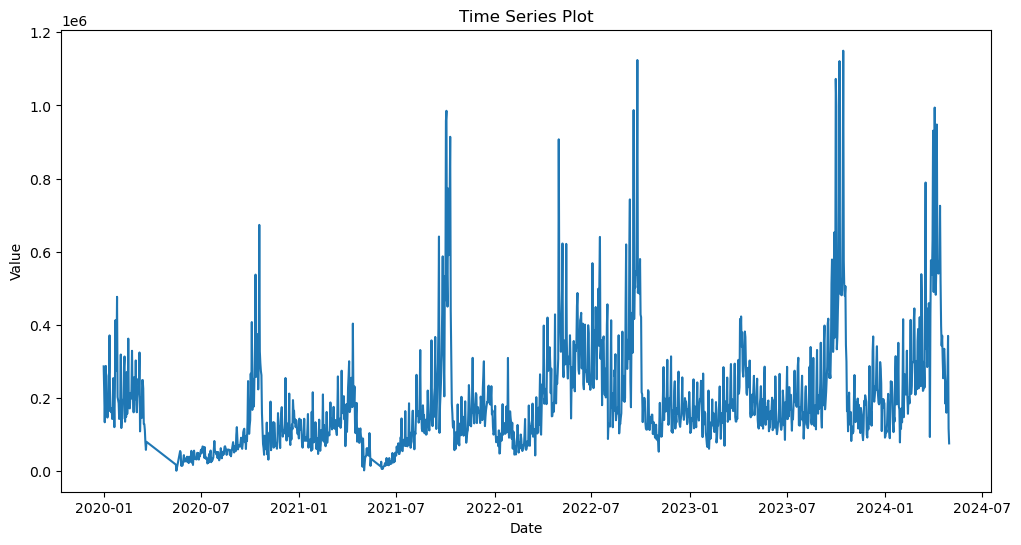

In [34]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df_f['ds'], df_f['y'])
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [40]:
# Augmented Dickey-Fuller (ADF) Test
# ADF Test: If the p-value is less than 0.05, you can reject the null hypothesis (series is stationary
adf_result = adfuller(df_f['y'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

ADF Statistic: -4.909617597699826
p-value: 3.340184056954221e-05


In [41]:
# KPSS Test
# KPSS Test: If the p-value is greater than 0.05, you cannot reject the null hypothesis (series is stationary).
kpss_result = kpss(df_f['y'], regression='c')
print('KPSS Statistic:', kpss_result[0])
print('p-value:', kpss_result[1])

KPSS Statistic: 1.3831040360329612
p-value: 0.01


C:\Users\House of Musa\AppData\Local\Temp\ipykernel_26992\3875939162.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(df_f['y'], regression='c')


In [42]:
#Differencing: A common technique to make the series stationary. You can also use log transformation or seasonal decomposition.
# Differencing to make the series stationary
df_f['y_diff'] = df_f['y'].diff().dropna()

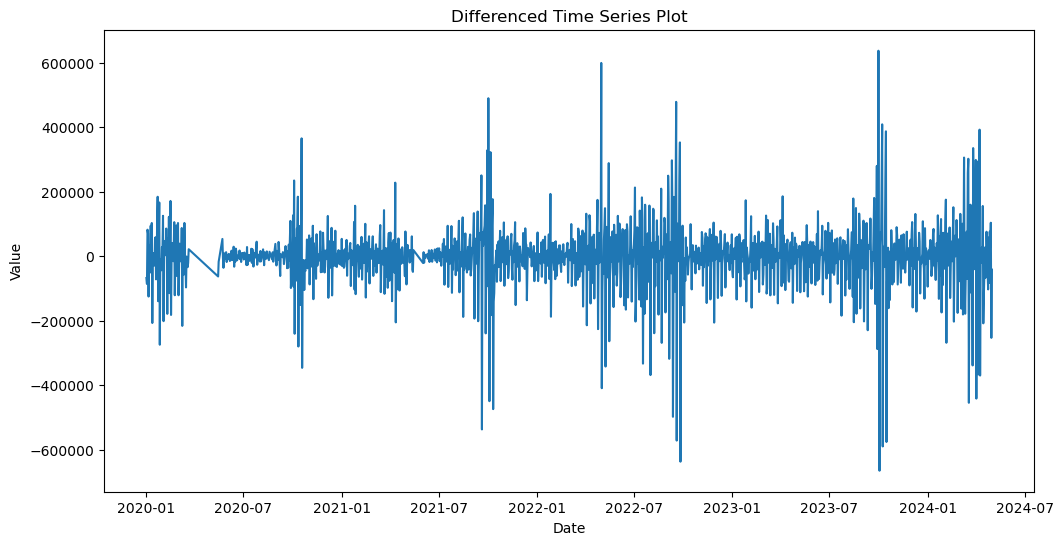

In [43]:
# Plot the differenced series
plt.figure(figsize=(12, 6))
plt.plot(df_f['ds'], df_f['y_diff'])
plt.title('Differenced Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [44]:

# ADF Test on differenced series
adf_result_diff = adfuller(df_f['y_diff'].dropna())
print('ADF Statistic (differenced):', adf_result_diff[0])
print('p-value (differenced):', adf_result_diff[1])

# KPSS Test on differenced series
kpss_result_diff = kpss(df_f['y_diff'].dropna(), regression='c')
print('KPSS Statistic (differenced):', kpss_result_diff[0])
print('p-value (differenced):', kpss_result_diff[1])

ADF Statistic (differenced): -11.09024698394111
p-value (differenced): 4.0993000702131236e-20
KPSS Statistic (differenced): 0.036596642436105005
p-value (differenced): 0.1


C:\Users\House of Musa\AppData\Local\Temp\ipykernel_26992\3100002609.py:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result_diff = kpss(df_f['y_diff'].dropna(), regression='c')


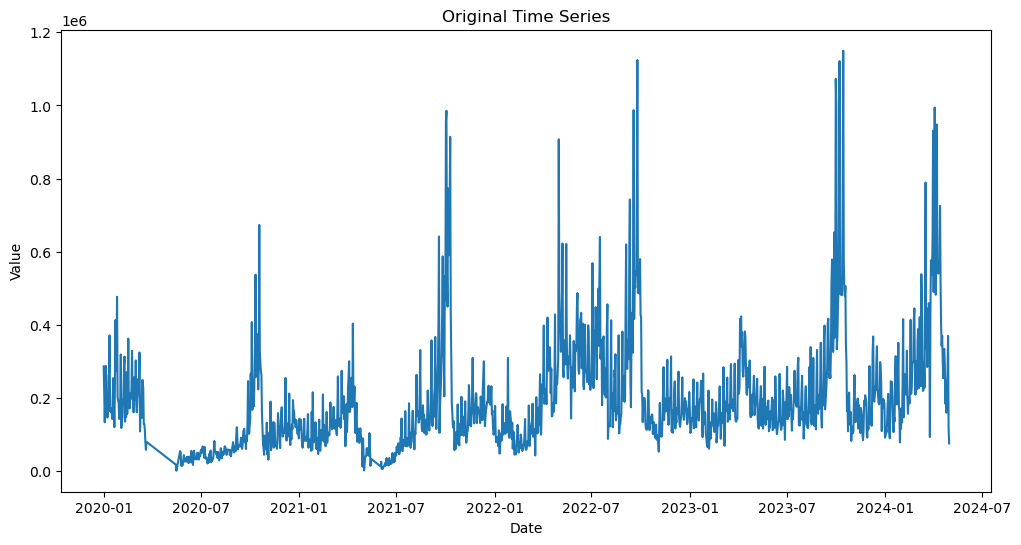

Differencing Level: 0, ADF p-value: 3.340184056954221e-05
Series is stationary at differencing level 0


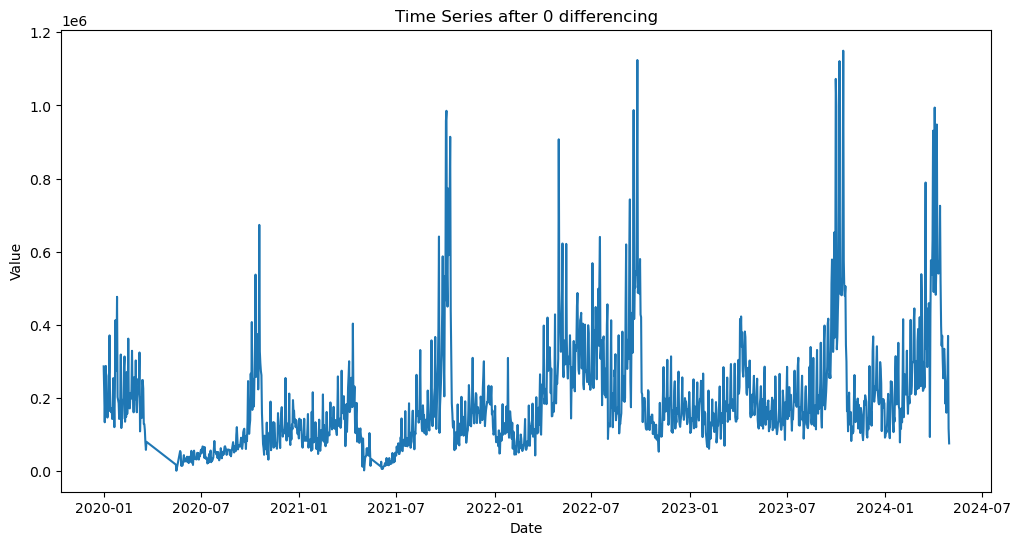

In [46]:
def adf_test(series, signif=0.05):
    """
    Perform ADF test to check for stationarity.
    """
    result = adfuller(series, autolag='AIC')
    p_value = result[1]
    return p_value < signif  # Return True if series is stationary

def difference_series(df_f, max_diff=5):
    """
    Difference the series until it becomes stationary or max differencing level is reached.
    """
    diff_count = 0
    while diff_count < max_diff:
        p_value = adfuller(df_f['y'].dropna())[1]
        print(f'Differencing Level: {diff_count}, ADF p-value: {p_value}')
        if p_value < 0.05:
            print(f'Series is stationary at differencing level {diff_count}')
            return df_f, diff_count
        df_f['y'] = df_f['y'].diff().dropna()
        diff_count += 1
    print(f'Max differencing level reached. Series may still be non-stationary.')
    return df_f, diff_count

# Plot the original series
plt.figure(figsize=(12, 6))
plt.plot(df_f['ds'], df_f['y'])
plt.title('Original Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# Differencing the series until it becomes stationary
df_diff, num_diffs = difference_series(df_f.copy())

# Plot the differenced series
plt.figure(figsize=(12, 6))
plt.plot(df_f['ds'][num_diffs:], df_diff['y'])
plt.title(f'Time Series after {num_diffs} differencing')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()